<a href="https://colab.research.google.com/github/gichlord/CV/blob/main/Aufgabe_Entscheidungsb%C3%A4ume_anwenden_(Wine_Quality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thema: Entscheidungsbäume

**1. Der Algorithmus grundlegend erklärt**




Der Entscheidungsbaum ist ein Algorithmus, der genutzt wird, um Entscheidungen auf Basis von bestimmten Eingaben zu treffen.
Dabei handelt es sich - wie der Name bereits vermuten lässt - um ein baumartiges Modell, dessen Entscheidungsregeln auf den Merkmalen der Eingangsdaten basiert.
Der Entscheidungsbaum unterteilt sich in Knoten, Kanten und Blätter:


1.   **Knoten:** Sie repräsentieren die Merkmale oder Attribute, nach denen die Daten aufgeteilt werden.
2.   **Kanten:** Sie stellen möglichen Ausgänge eines Knotens dar, abhängig von den Bedingungen, die an jedem Knoten abgefragt werden.
3.   **Blätter:** Sie stellen die endgültige Entscheidung oder Klassifikation dar.






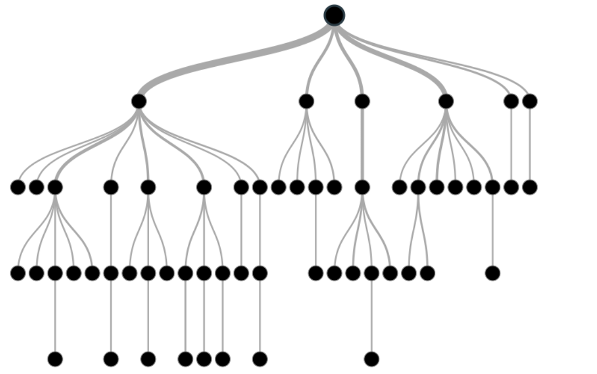

Quelle: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

**2. Funktionsweise und Verwendungszweck**

Der Entscheidungsbaum ist ein nichtparametrischer **überwachter Lernansatz**, der sowohl für Klassifizierungs-, als auch für Regressionsanwendungen verwendet werden kann.
Die Entscheidungen, die ein Entscheidungsbaum trifft, resultieren aus den Eingangsdaten, die durch Entscheidungsregeln in Teilmengen unterteilt werden. Er verwendet eine Baumstruktur, um Vorhersagen zu treffen, die sich aus den merkmalsbasierten Aufteilungen ergeben. Es beginnt mit einem Wurzelknoten und endet mit einer Entscheidung, die von Blättern getroffen wird:

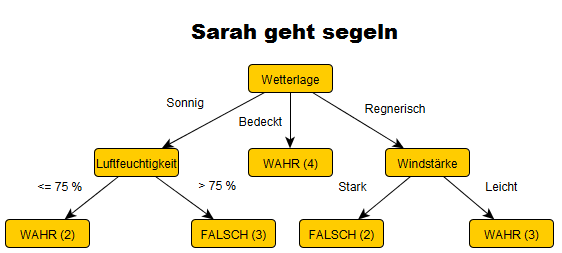

Quelle: https://de.m.wikipedia.org/wiki/Datei:Diagramm_beispiel_sarah_geht_segeln.png

Der Anwendungsfall "Sarah geht segeln" spiegelt die Funktionsweise in einfacher Form dar. Entschieden wird auf Grundlage des Wetters:

*   Wurzelknoten: "Wetterlage"
  *   Wetterlage: Ist es sonnig oder regnerisch? (Wir sagen: es ist regnerisch)
      *   Ist es regnerisch und die Windstärke ist stark:
          *   FALSCH -> Sarah geht **nicht** segeln
      *   Ist es regnerisch und die Windstärke ist schwach:
          *   WAHR -> Sarah geht segeln


**3. Vorteile und Nachteile**

Vorteile von Entscheidungsbäumen


*   Die visuelle Darstellung macht es leicht, die Entscheidungsregeln nachzuvollziehen.
*   Kann sowohl für Klassifikations- als auch für Regressionsprobleme verwendet werden.
*   Erfordert keine Skalierung oder Normierung der Daten.


Nachteile von Entscheidungsbäumen


*   Entscheidungsbäume neigen dazu, die Trainingsdaten zu stark zu lernen, besonders wenn sie zu tief sind (Gefahr von Overfitting).
*   Kleine Änderungen in den Daten können zu einem völlig anderen Baum führen.
*   Wenn die Daten stark unausgeglichen sind, kann der Baum zu den häufigeren Klassen tendieren.


**4. Welche Parameter gibt es?**

*max_depth*: Begrenzung der Baumtiefe, um Überanpassung zu vermeiden.

*min_samples_split*: Mindestanzahl an Datenpunkten, um einen Split vorzunehmen; kontrolliert die Anzahl der Splits und verhindert Überanpassung.

*min_samples_leaf*: Mindestanzahl an Datenpunkten, die ein Blatt enthalten muss; verhindert zu kleine Blätter und erhöht die Robustheit.

*max_features*: Maximale Anzahl an Merkmalen, die für einen Split in Betracht gezogen werden; beeinflusst Modellkomplexität und Laufzeit.

*criterion*: Kriterium zur Bewertung der Qualität eines Splits (z.B. "Gini" oder "entropy"); beeinflusst die Art der Klassifikation.

*max_leaf_nodes*: Begrenzung der maximalen Anzahl der Blattknoten; kontrolliert die Größe und Komplexität des Baums.

*min_impurity_decrease*: Mindestwert für die Verringerung der Verunreinigung, um einen Split vorzunehmen; vermeidet unnötige Splits.

*class_weight*: Gewichtung der Klassen zur Korrektur von Klassenungleichgewichten; beeinflusst die Berücksichtigung seltener Klassen.

*splitter*: Split-Strategie ("best" oder "random"); beeinflusst die Genauigkeit und Laufzeit des Modells.

# Praxisbeispiel: Weinqualität vorhersagen

Der Datensatz stammt von Kaggle https://www.kaggle.com/datasets/rajyellow46/wine-quality
Ziel ist es, die Weinqualität vorherzusagen anhand verschiedener Merkmale wie pH-Wert, Alkoholgehalt, Zuckergehalt, etc.

In [640]:
# Import der Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve

Die Daten werden von einer CSV-Datei eingelesen

In [641]:
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

# Daten einlesen und Vorbereiten
df = pd.read_csv('/content/drive/MyDrive/Python_DataScience/ML/winequalityN.csv', encoding='iso-8859-1')
print(df.head(),"\n")
print(df.tail(), "\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0 

Der "Type" wird hier in Stringform ausgegeben, damit dass Modell trainieren kann, werden wir die Types in 0 = "white" und 1 = "red" ändern

In [642]:
# "white" und "red" durch 0 und 1 ersetzen (white = 0, red = 1)
df["type"] = df["type"].replace({"white": 0, "red": 1})

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Auch sollte überprüft werden, ob ungültige Werte (NaN-Werte) im Datensatz enthalten sind, und falls ja, diese zu löschen:

In [643]:
# Überprüfen auf NaN-Werte
nan_count = df.isna().sum()
print("Anzahl der NaN-Werte:")
print(nan_count)

# Alle Zeilen mit NaN-Werten entfernen
df = df.dropna()

Anzahl der NaN-Werte:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


Danach werfen wir einen kurzen Blick auf die Verteilung der Qualität:

In [644]:
quality_sums = df["quality"].value_counts()
quality_sums = quality_sums.sort_index() # Nach Reihenfolge sortiert
print(quality_sums, "\n")

# Prozentuale Verteilung
quality_percent = df["quality"].value_counts(normalize=True) * 100
quality_percent = quality_percent.sort_index()  # Nach Reihenfolge sortieren
print(quality_percent)

quality
3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
Name: count, dtype: int64 

quality
3     0.464181
4     3.311156
5    32.925886
6    43.632988
7    16.617670
8     2.970757
9     0.077363
Name: proportion, dtype: float64


Nachdem wir die Daten gesichtet und bearbeitet haben, setzen wir unsere Merkmale und Zielvariablen. "Quality" wird dabei unser Zielwert:

In [645]:
# Merkmale (X) und Zielwerte (y) extrahieren
X = df.drop('quality', axis=1)  # Merkmale, axis=1 -> Spalte (axis=0 wäre eine Zeile)
y = df['quality']  # Zielwert

Dann teilen wir die Daten in Trainings- und Testdatensätze auf:

In [646]:
# Aufteilen der Daten in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dann erstellen wir ein Entscheidungsbaummodell und trainieren es:

In [647]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Danach können wir eine Vorhersage machen und das Modell anhand von Metriken bewerten:

In [648]:
y_pred = model.predict(X_test)

def metrics(y_test, y_pred):
    # Berechnung der Metriken
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    return accuracy, classification

accuracy, classification = metrics(y_test, y_pred)

# Ausgabe der Metriken
print("Accuracy:", accuracy)
print("Classification Report:\n", classification)


Accuracy: 0.5274555297757154
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        48
           5       0.63      0.58      0.60       430
           6       0.50      0.72      0.59       540
           7       0.38      0.18      0.24       228
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1293
   macro avg       0.22      0.21      0.21      1293
weighted avg       0.48      0.53      0.49      1293



Lassen wir uns das Ganze visuell darstellen:

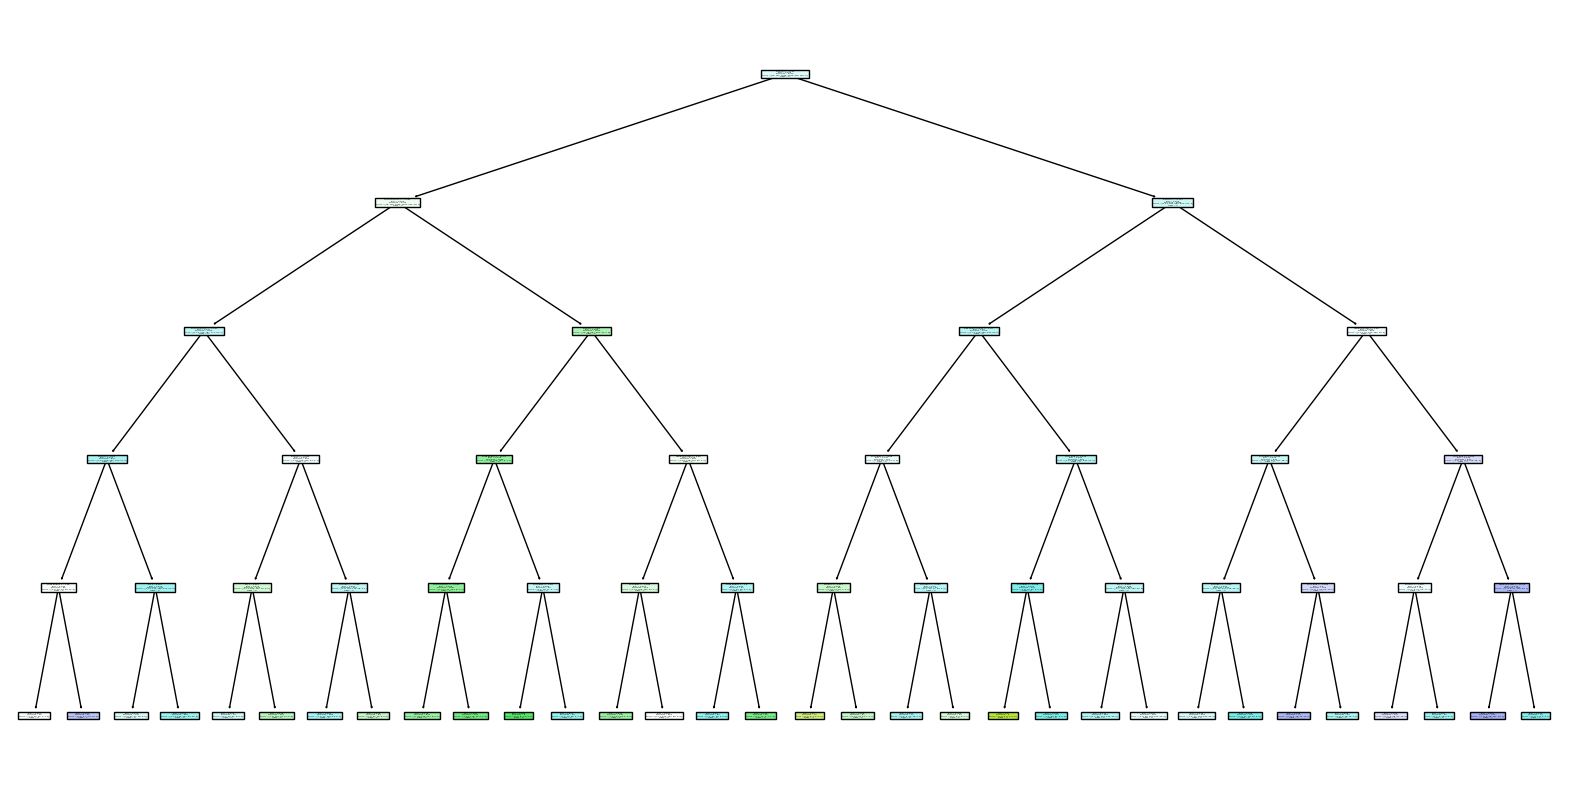

In [649]:
plt.figure(figsize=(20,10))  # Größe der Grafik anpassen
plot_tree(model,
          feature_names=X.columns,  # Merkmalsnamen aus den Spaltennamen des DataFrames
          class_names=[str(i) for i in sorted(y.unique())],  # Klassen aus den Zielvariablen
          filled=True)  # Gefüllte Knoten zur besseren Visualisierung
plt.show()

Die Accuracy liegt mit 0.52 noch unter zufriedenstellenden Ergebnissen. Mögliche Gründe könnten welche sein, die bei den Nachteilen bereits angesprochen wurden:

"*Wenn die Daten stark unausgeglichen sind, kann der Baum zu den häufigeren Klassen tendieren*." - Dies ist im Classification Report aufgefallen.

In der Verteilung der einzelnen Werte ist bereits aufgefallen, dass sich der Großteil in einem bestimmten Bereich wiederfindet:

In [650]:
quality_sums = df["quality"].value_counts()
quality_sums = quality_sums.sort_index() # Nach Reihenfolge sortiert
print(quality_sums, "\n")

# Prozentuale Verteilung
quality_percent = df["quality"].value_counts(normalize=True) * 100
quality_percent = quality_percent.sort_index()  # Nach Reihenfolge sortieren
print(quality_percent)

quality
3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
Name: count, dtype: int64 

quality
3     0.464181
4     3.311156
5    32.925886
6    43.632988
7    16.617670
8     2.970757
9     0.077363
Name: proportion, dtype: float64


Visuell dargestellt wird es deutlicher:

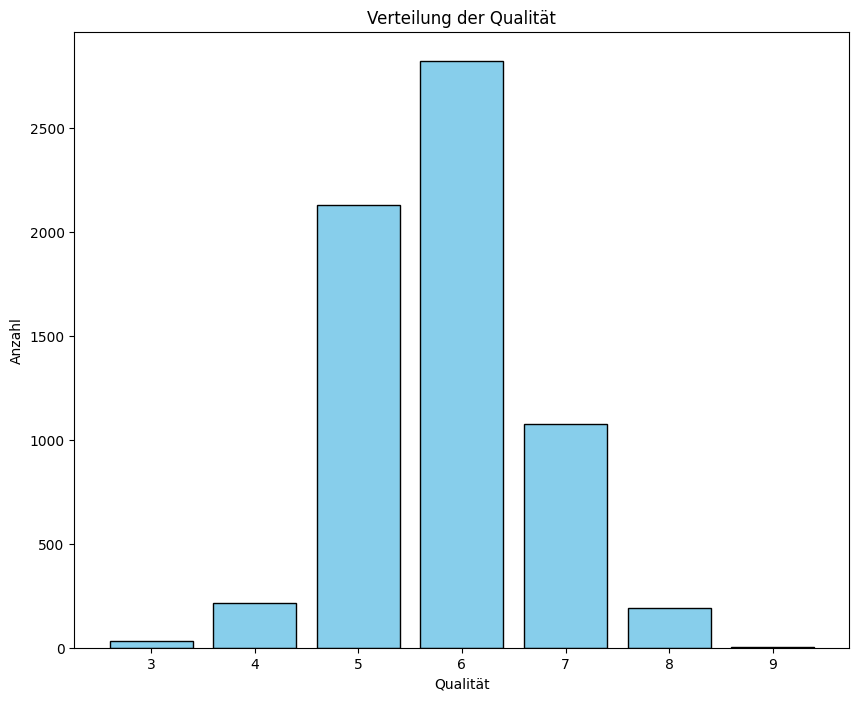

In [651]:
# Daten werden zusammengezählt
quality_sums = df["quality"].value_counts().sort_index()

# Balkendiagramm
plt.figure(figsize=(10, 8))
plt.bar(quality_sums.index, quality_sums.values, color='skyblue', edgecolor='black')
plt.xlabel('Qualität')
plt.ylabel('Anzahl')
plt.title('Verteilung der Qualität')
plt.xticks(quality_sums.index)

# Diagramm anzeigen
plt.show()

Die Überlegung ist es jetzt, Datensätze mit geringem Anteil zu löschen. Dazu zählen alle Datensätze mit Qualität 3, 4, 8 und 9, da diese insgesamt um die 7 Prozent ausmachen:

In [652]:
# Alle Werte in eine Liste packen, die berücksichtigt werden sollen:
remove = [3, 4, 8, 9]

# Den DataFrame filtern, indem alle Datensätze gelöscht werden, in denen bei der Spalte "quality" die Werte von remove [3, 4, 8, 9] enthalten sind
df_filtered = df[~df["quality"].isin(remove)]  # Die Tilde ~ negiert den boolischen Wert, sprich -> Statt True für die Werte zu erhalten,
# die in 'remove' enthalten sind, erhältst man nun True für die Werte, die nicht in 'remove' enthalten sind.


# Erneuter Check der Daten:
quality_sums = df_filtered["quality"].value_counts()
quality_sums = quality_sums.sort_index() # Nach Reihenfolge sortiert
print(quality_sums, "\n")

# Prozentuale Verteilung
quality_percent = df_filtered["quality"].value_counts(normalize=True) * 100
quality_percent = quality_percent.sort_index()  # Nach Reihenfolge sortieren
print(quality_percent)

quality
5    2128
6    2820
7    1074
Name: count, dtype: int64 

quality
5    35.337097
6    46.828296
7    17.834606
Name: proportion, dtype: float64


Die Daten wurden nun erneut bearbeitet und die gering repräsentierten Datensätze wurden entfernt. Nun versuchen wir einen weiteren Anlauf mit dem aktualisierten DataFrame:

In [653]:
# Merkmale (X) und Zielwerte (y) extrahieren
X_2 = df_filtered.drop('quality', axis=1)  # Merkmale, axis=1 -> Spalte (axis=0 wäre eine Zeile)
y_2 = df_filtered['quality']  # Zielwert

# Aufteilen der Daten in Trainings- und Testdatensatz
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.1, random_state=42)


Um die Gewichtung möglichst gleichwertig zu gestalten, gehen wir einen extra Schritt und setzen die Gewichtung in Relation zur proportionalen Verteilung der einzelnen Klassen:

In [654]:
# Proportionen speichern
proportions = [35.337097, 46.828296, 17.834606]

def normalize_weights(*proportions):
    # 1. Schritt: Umkehrung der Gewichte für jede übergebene Proportion (1 / Proportion)
    inverted_weights = [1 / p for p in proportions]

    # 2. Schritt: Summe der umgekehrten Gewichte berechnen
    total_weight = sum(inverted_weights)

    # 3. Schritt: Normalisierung der Gewichte (Gewicht durch Totalgewicht * Anzahl der Proportionen)
    normalized_weights = [(w / total_weight) * len(proportions) for w in inverted_weights]

    return normalized_weights

# Test Ausgabe
normalized_weights = normalize_weights(*proportions)
print(f"Gewichtung 1: {normalized_weights[0]}")
print(f"Gewichtung 2: {normalized_weights[1]}")
print(f"Gewichtung 3: {normalized_weights[2]}")


Gewichtung 1: 0.8030004412645022
Gewichtung 2: 0.6059521039161134
Gewichtung 3: 1.5910474548193845


Jetzt können die Gewichtungen im Parameter "class_weight" übergeben werden. Außerdem schauben wir noch an "criterion" und "max_depth":

In [655]:
model_2 = DecisionTreeClassifier(class_weight={5: normalized_weights[0], 6: normalized_weights[1], 7: normalized_weights[2]}, max_leaf_nodes=1080, criterion="log_loss", max_depth=25, random_state=42)
model_2.fit(X_2_train, y_2_train)

y_pred_2 = model_2.predict(X_2_test)


# Aufruf der Funktion metrics()
accuracy_2, classification_2 = metrics(y_2_test, y_pred_2)

# Ausgabe der Metriken
print("Accuracy:", accuracy_2)
print("Classification Report:\n", classification_2)

Accuracy: 0.6832504145936982
Classification Report:
               precision    recall  f1-score   support

           5       0.72      0.71      0.72       221
           6       0.70      0.69      0.69       271
           7       0.58      0.61      0.60       111

    accuracy                           0.68       603
   macro avg       0.67      0.67      0.67       603
weighted avg       0.68      0.68      0.68       603



Die Accuracy ist jetzt mit 0.68 etwas höher als vorher. Der größte Einfluss auf das Ergebnis hat die Entschlackung der Datensätze.

Die Minimierung der Test_size auf = 0.1 wirkte sich ebenfalls positiv aus.

Auch "**max_depth**" und "**max_leaf_nodes**" hatten Auswirkungen auf das Ergebnis. Niedrigere Werte verschlechterten die Performance enorm, während höhere keine oder minimale Veränderung erzielten.

Auch hier können wir uns den Entscheidungsbaum visuell darstellen lassen:

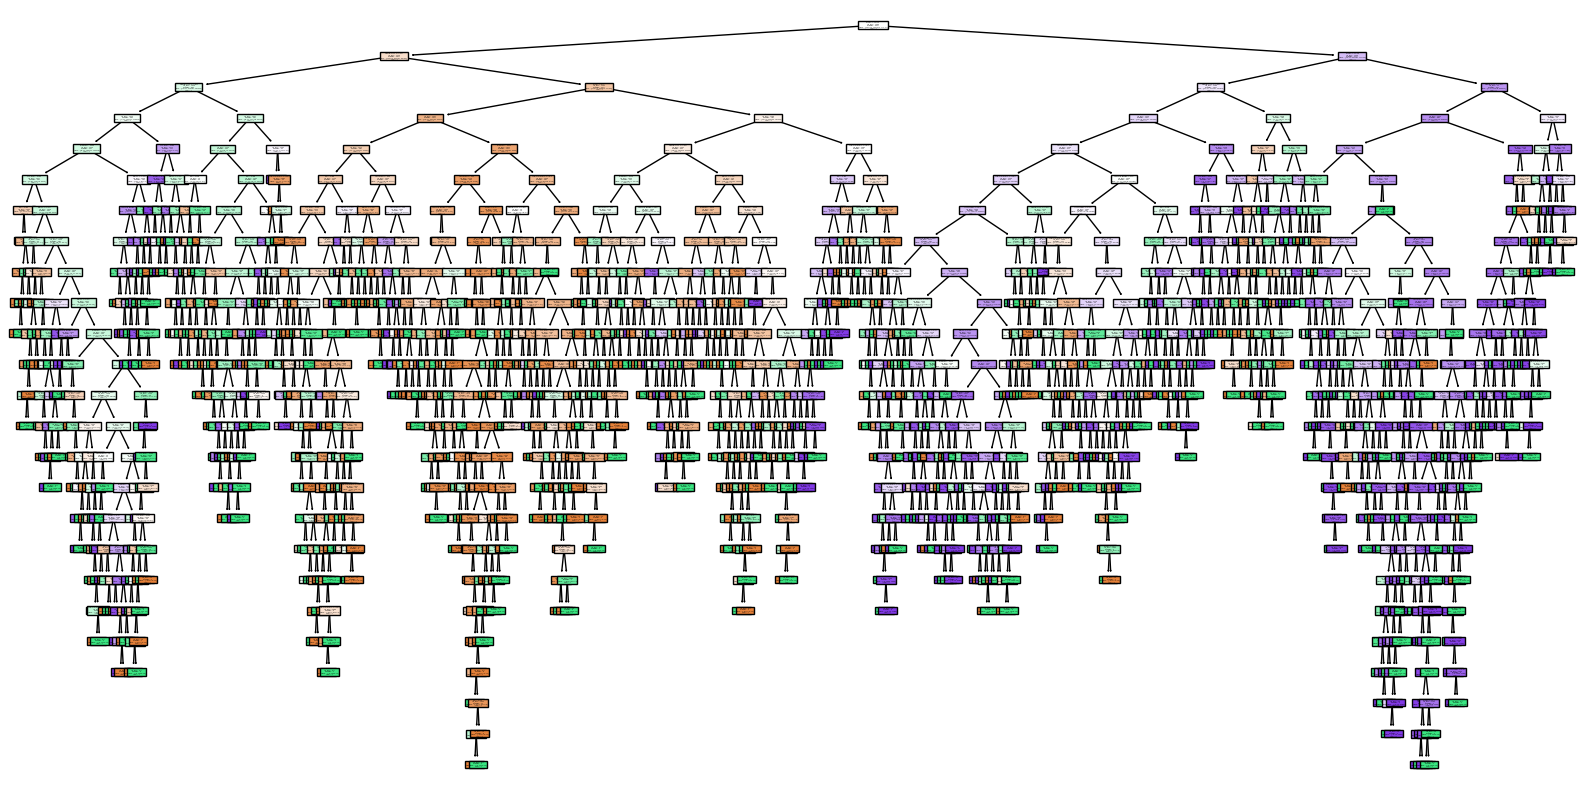

In [656]:
plt.figure(figsize=(20,10))  # Größe der Grafik anpassen
plot_tree(model_2,
          feature_names=X_2.columns,  # Merkmalsnamen aus den Spaltennamen des DataFrames
          class_names=[str(i) for i in sorted(y.unique())],  # Klassen aus den Zielvariablen
          filled=True)  # Gefüllte Knoten zur besseren Visualisierung
plt.show()

Um das Verhalten der Modelle während des Trainings zu verstehen, lohnt sich ein Blick auf einen Lernkurvenvergleich. Dieser verdeutlicht visuell die Performance beider Modelle:

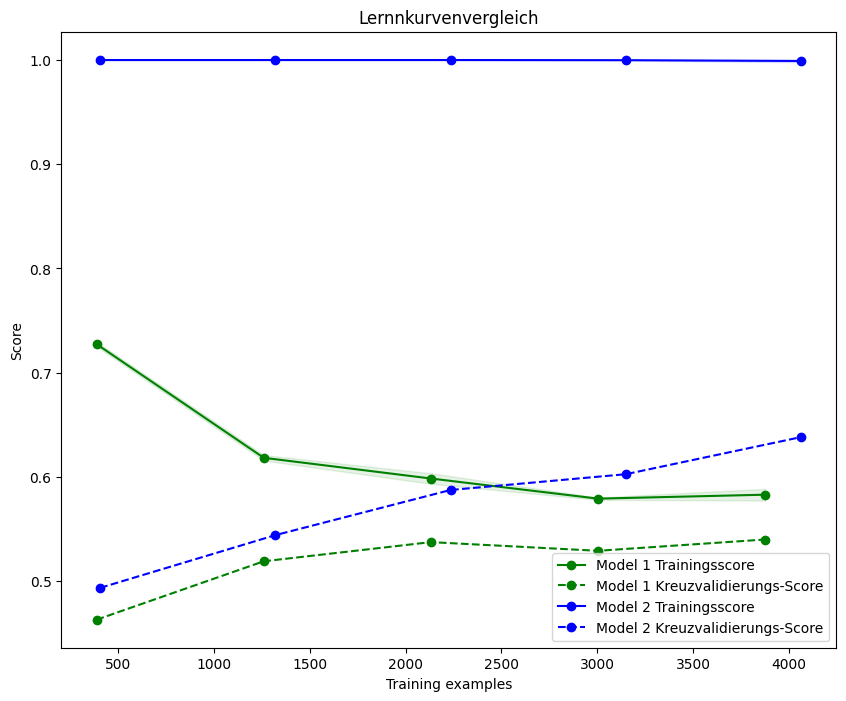

In [657]:
# Lernkurven berechnen
train_sizes_1, train_scores_1, test_scores_1 = learning_curve(model, X_train, y_train, cv=4)
train_sizes_2, train_scores_2, test_scores_2 = learning_curve(model_2, X_2_train, y_2_train, cv=4)

# Mittelwerte und Standardabweichungen berechnen
train_mean_1 = train_scores_1.mean(axis=1)
train_std_1 = train_scores_1.std(axis=1)
test_mean_1 = test_scores_1.mean(axis=1)
test_std_1 = test_scores_1.std(axis=1)

train_mean_2 = train_scores_2.mean(axis=1)
train_std_2 = train_scores_2.std(axis=1)
test_mean_2 = test_scores_2.mean(axis=1)
test_std_2 = test_scores_2.std(axis=1)

# Plotten der Lernkurven
plt.figure(figsize=(10, 8))
plt.plot(train_sizes_1, train_mean_1, 'o-', color='green', label='Model 1 Trainingsscore')
plt.plot(train_sizes_1, test_mean_1, 'o-', color='green', linestyle='--', label='Model 1 Kreuzvalidierungs-Score')

plt.plot(train_sizes_2, train_mean_2, 'o-', color='blue', label='Model 2 Trainingsscore')
plt.plot(train_sizes_2, test_mean_2, 'o-', color='blue', linestyle='--', label='Model 2 Kreuzvalidierungs-Score')

plt.fill_between(train_sizes_1, train_mean_1 - train_std_1, train_mean_1 + train_std_1, color='green', alpha=0.1)
plt.fill_between(train_sizes_2, train_mean_2 - train_std_2, train_mean_2 + train_std_2, color='blue', alpha=0.1)

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Lernnkurvenvergleich')
plt.legend()
plt.show()

Zum Schluss nochmal der entgültige Vergleich zusammengefasst in Zahlen:

In [658]:
# Ausgabe sämtlicher Werte
print("Accuracy Model 1:", accuracy)
print("Accuracy Model 2:", accuracy_2, "\n")

print("Classification Report Model 1:\n", classification)
print("Classification Report Model 2:\n", classification_2, "\n")

# Training Score und Mittelwert
print("Training Scores Model 1:", train_mean_1)
print("Durchschnittlicher Training Score Model 1:", np.mean(train_mean_1), "\n")

print("Test Scores Model 1:", test_mean_1)
print("Durchschnittlicher Test Score Model 1:", np.mean(test_mean_1), "\n")

print("Training Scores Model 2:", train_mean_2)
print("Durchschnittlicher Training Score Model 2:", np.mean(train_mean_2), "\n")

print("Test Scores Model 2:", test_mean_2)
print("Durchschnittlicher Test Score Model 2:", np.mean(test_mean_2), "\n")

# Trainingsgröße und Mittelwert
print("Trainingsgrößen Model 1:", train_sizes_1)
print("Durchschnittliche Trainingsgröße Model 1:", np.mean(train_sizes_1), "\n")

print("Trainingsgrößen Model 2:", train_sizes_2)
print("Durchschnittliche Trainingsgröße Model 2:", np.mean(train_sizes_2), "\n")

# Standardabweichung und Mittelwert
print("Standardabweichungen Training Score Model 1:", train_std_1)
print("Durchschnittliche Standardabweichung Training Score Model 1:", np.mean(train_std_1), "\n")

print("Standardabweichungen Training Score Model 2:", train_std_2)
print("Durchschnittliche Standardabweichung Training Score Model 2:", np.mean(train_std_2), "\n")

Accuracy Model 1: 0.5274555297757154
Accuracy Model 2: 0.6832504145936982 

Classification Report Model 1:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        48
           5       0.63      0.58      0.60       430
           6       0.50      0.72      0.59       540
           7       0.38      0.18      0.24       228
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1293
   macro avg       0.22      0.21      0.21      1293
weighted avg       0.48      0.53      0.49      1293

Classification Report Model 2:
               precision    recall  f1-score   support

           5       0.72      0.71      0.72       221
           6       0.70      0.69      0.69       271
           7       0.58      0.61      0.60       111

    accuracy                           0.68  

**Fazit**

Beim Entscheidungsbaum ist es entscheidend, welche Datensätze hineinkommen. Ein verstreuter Datensatz mit Ausreißern kann die Performance stark beeinträchtigen.
Mit Datenbearbeitung, Gewichtung und anderen Parametern kann man die Performance verbessern.